In [1]:

!pip install pyreadr
!pip install cufflinks

You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import cufflinks as cf
import plotly.offline as plyo
plyo.init_notebook_mode(connected=True)

In [3]:

import pyreadr

result = pyreadr.read_r('stocks.rds') # also works for RData

# done! 
# result is a dictionary where keys are the name of objects and the values python
# objects. In the case of Rds there is only one object with None as key
df = result[None] 

In [4]:
import pandas as pd

df=pd.DataFrame(df)

In [5]:
df.head()

,ticker,date,open,high,low,close,volume
0,a,2005-01-03,16.268,16.322,15.863,16.119,3580384.0
1,a,2005-01-04,16.052,16.194,15.560,15.694,3970435.0
2,a,2005-01-05,15.640,15.964,15.608,15.687,4131760.0
3,a,2005-01-06,15.797,15.824,15.316,15.344,3347065.0
4,a,2005-01-07,15.309,15.492,15.275,15.330,2780878.0


<AxesSubplot:>

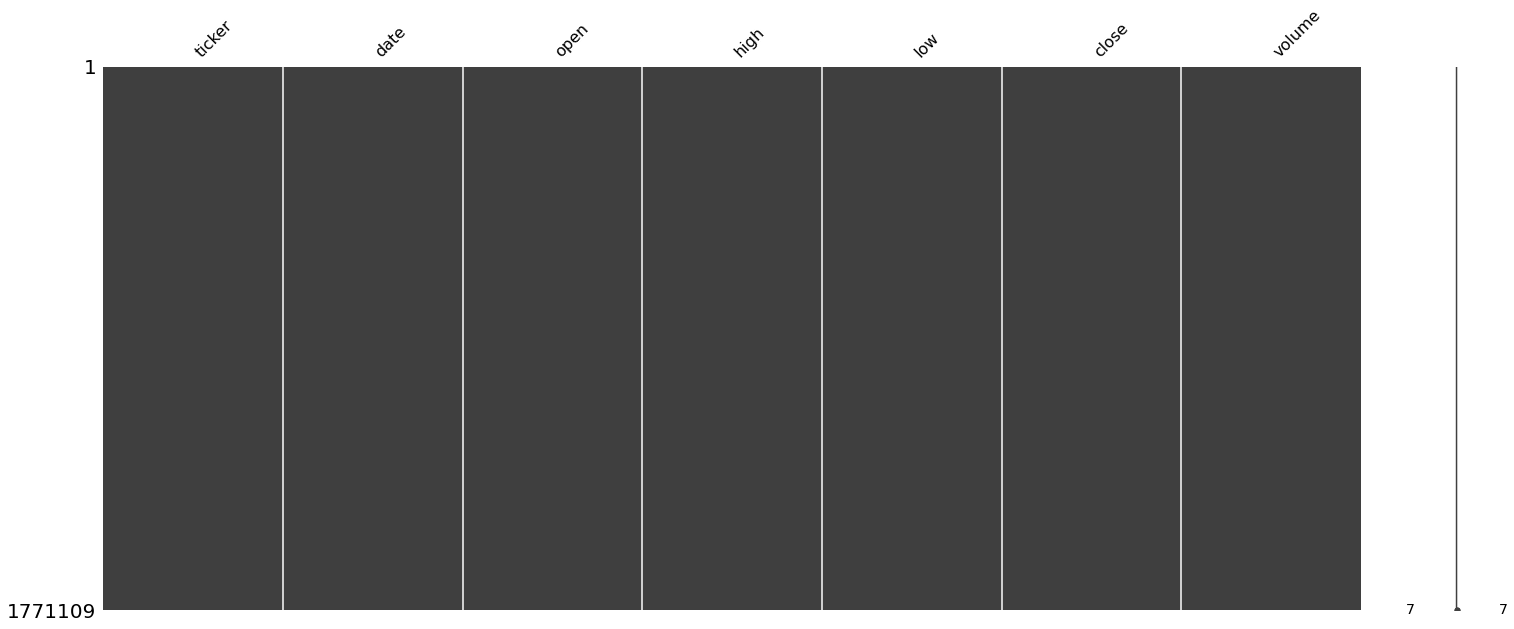

In [6]:
import missingno as msno
msno.matrix(df)

no non-numerical value,missing data might be zeroes where they dont make sense, to be handled when encountered.

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaling=df.drop(['ticker','date'],axis=1)
df_scaled=pd.DataFrame(sc.fit_transform(df_scaling),columns=['open','high','low','close','volume'])
df_scaled.head()

,open,high,low,close,volume
0,-0.043980,-0.044079,-0.043930,-0.044001,0.145917
1,-0.044012,-0.044098,-0.043976,-0.044065,0.177474
2,-0.044074,-0.044133,-0.043968,-0.044066,0.190526
3,-0.044050,-0.044154,-0.044012,-0.044117,0.127040
4,-0.044124,-0.044203,-0.044019,-0.044119,0.081232


In [8]:
df_scaled['ticker']=df['ticker']
df_scaled['date']=df['date']

In [9]:
df_scaled.head()

,open,high,low,close,volume,ticker,date
0,-0.043980,-0.044079,-0.043930,-0.044001,0.145917,a,2005-01-03
1,-0.044012,-0.044098,-0.043976,-0.044065,0.177474,a,2005-01-04
2,-0.044074,-0.044133,-0.043968,-0.044066,0.190526,a,2005-01-05
3,-0.044050,-0.044154,-0.044012,-0.044117,0.127040,a,2005-01-06
4,-0.044124,-0.044203,-0.044019,-0.044119,0.081232,a,2005-01-07


In [10]:
tickers=df_scaled.groupby('ticker')
tickers.groups.keys()

dict_keys(['a', 'aa', 'aal', 'aamc', 'aame', 'aan', 'aaoi', 'aaon', 'aap', 'aapl', 'aat', 'aau', 'aaww', 'aaxn', 'ab', 'abbv', 'abc', 'abcb', 'abeo', 'abev', 'abg', 'abio', 'abm', 'abmd', 'abr', 'abt', 'abtx', 'abus', 'ac', 'acad', 'acbi', 'acc', 'acco', 'acer', 'achc', 'achv', 'acia', 'aciw', 'acls', 'acm', 'acmr', 'acnb', 'acor', 'acre', 'acrs', 'acrx', 'acst', 'actg', 'acu', 'acv', 'acy', 'adbe', 'adc', 'ades', 'adi', 'adm', 'adma', 'admp', 'adms', 'adom', 'adp', 'adro', 'ads', 'adsk', 'adsw', 'adtn', 'adus', 'advm', 'adx', 'adxs', 'ae', 'aee', 'aegn', 'aehr', 'aeis', 'ael', 'aem', 'aemd', 'aeo', 'aep', 'aeri', 'aes', 'aey', 'aezs', 'afb', 'afg', 'afh', 'afhbl', 'afi', 'afl', 'aft', 'ag', 'agco', 'agen', 'agfs', 'agi', 'agio', 'agle', 'agm', 'agm-a', 'agnc', 'agncn', 'agr', 'agro', 'agrx', 'agtc', 'agx', 'agys', 'ahc', 'ahh', 'ahpi', 'aht', 'ai', 'aif', 'aig', 'aimc', 'aimt', 'ain', 'ainc', 'ainv', 'air', 'airg', 'airi', 'airt', 'ait', 'aiv', 'aiw', 'aiz', 'ajg', 'ajrd', 'ajx', 'aka

In [11]:
import numpy as np
ticker_means=tickers.agg(np.mean)
ticker_stds=tickers.agg(np.std)
ticker_medians=tickers.agg(np.median)


In [12]:
tickers.agg(np.mean)

,open,high,low,close,volume
ticker,,,,,
a,-0.041989,-0.042061,-0.041911,-0.041985,0.186915
aa,-0.040754,-0.040801,-0.040715,-0.040760,0.616740
aal,-0.040247,-0.040286,-0.040204,-0.040246,0.668974
aamc,-0.005132,-0.004285,-0.005898,-0.005008,-0.142329
aame,-0.046000,-0.046089,-0.045911,-0.045998,-0.143213
...,...,...,...,...,...
cli,-0.042685,-0.042757,-0.042612,-0.042684,-0.060271
clir,-0.045523,-0.045595,-0.045454,-0.045524,-0.138675
clm,-0.043918,-0.044000,-0.043840,-0.043919,-0.133954


In [13]:
plyo.iplot(
    ticker_means['close'].iplot(asFigure=True),
    image='png',
    filename='ply_01'
)

In [14]:
plyo.iplot(
    ticker_stds['close'].iplot(asFigure=True),
    image='png',
    filename='ply_02'
)

In [15]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
plyo.iplot(qf.iplot(asFigure=True),image='png',
          filename='qf_01')

In [16]:
qf.add_bollinger_bands(periods=15,boll_std=2)

plyo.iplot(qf.iplot(asFigure=True),image='png',
          filename='qf_04')

In [17]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
plyo.iplot(qf.iplot(asFigure=True),image='png',
          filename='qf_04')

In [18]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
qf.add_rsi(periods=20,color='java')
plyo.iplot(qf.iplot(asFigure=True),image='png',
          filename='qf_04')

In [19]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])


qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
plyo.iplot(qf.iplot(asFigure=True),image='png',
          filename='qf_04')

In [20]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
qf.add_cci()
plyo.iplot(qf.iplot(asFigure=True),image='png',filename='qf_04')

In [21]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
qf.add_ema()
plyo.iplot(qf.iplot(asFigure=True),image='png',filename='qf_04')

In [22]:
qf=cf.QuantFig(tickers.get_group('a')[-60:])
qf.add_shapes()
plyo.iplot(qf.iplot(asFigure=True),image='png',filename='qf_04')

#### refer to :-https://jpoles1.github.io/cufflinks/html/cufflinks.quant_figure.html

In [23]:
!pip install ta

You should consider upgrading via the 'c:\users\chait\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [65]:
from ta import add_all_ta_features
from ta.utils import dropna
from ta.volatility import BollingerBands,AverageTrueRange
from ta.momentum import AwesomeOscillatorIndicator,KAMAIndicator,ROCIndicator

tickers=df.groupby('ticker')
indicator_df=tickers.get_group('a')[-160:]

roc=ROCIndicator(close=indicator_df["close"])
ki=KAMAIndicator(close=indicator_df["close"])
atr=AverageTrueRange(indicator_df["high"],indicator_df["low"],indicator_df["close"])
indicator_bb = BollingerBands(close=indicator_df["close"], window=20, window_dev=2)
aoi=AwesomeOscillatorIndicator(high=indicator_df["high"],low=indicator_df["low"])

In [66]:
indicator_df["atr"]=atr.average_true_range()
indicator_df['ki']=ki.kama()
indicator_df['aoi']=aoi.awesome_oscillator() 
indicator_df['bb_bbm'] = indicator_bb.bollinger_mavg()
indicator_df['bb_bbh'] = indicator_bb.bollinger_hband()
indicator_df['bb_bbl'] = indicator_bb.bollinger_lband()
indicator_df['roc']=roc.roc()
# Add Bollinger Band high indicator
indicator_df['bb_bbhi'] = indicator_bb.bollinger_hband_indicator()

# Add Bollinger Band low indicator
indicator_df['bb_bbli'] = indicator_bb.bollinger_lband_indicator()

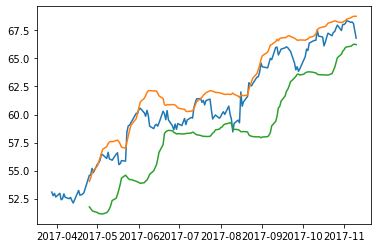

In [64]:
import matplotlib.pyplot as plt
plt.plot(indicator_df['date'],indicator_df['close'])
plt.plot(indicator_df['date'],indicator_df['bb_bbh'])
plt.plot(indicator_df['date'],indicator_df['bb_bbl'])

plt.show()

In [46]:
indicator_df.head()

,open,high,low,close,volume,ticker,date,atr,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli
3179,-0.037324,-0.037325,-0.037242,-0.037249,0.047396,a,2017-08-18,0.0,NaN,NaN,NaN,0.0,0.0
3180,-0.037275,-0.037284,-0.037140,-0.037175,-0.024485,a,2017-08-21,0.0,NaN,NaN,NaN,0.0,0.0
3181,-0.037158,-0.037132,-0.037006,-0.036993,-0.024684,a,2017-08-22,0.0,NaN,NaN,NaN,0.0,0.0
3182,-0.037030,-0.037080,-0.036893,-0.037021,-0.026556,a,2017-08-23,0.0,NaN,NaN,NaN,0.0,0.0
3183,-0.037008,-0.037112,-0.036930,-0.037035,-0.015301,a,2017-08-24,0.0,NaN,NaN,NaN,0.0,0.0


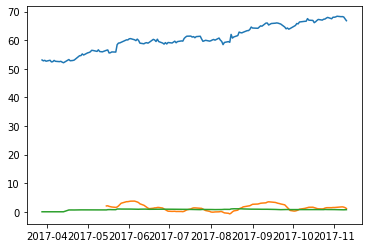

In [63]:
plt.plot(indicator_df['date'],indicator_df['close'])
plt.plot(indicator_df['date'],indicator_df['aoi'])
plt.plot(indicator_df['date'],indicator_df['atr'])


#### for more indicators, esentially too many to go through refer:- https://technical-analysis-library-in-python.readthedocs.io/en/latest/ta.html#momentum-indicators

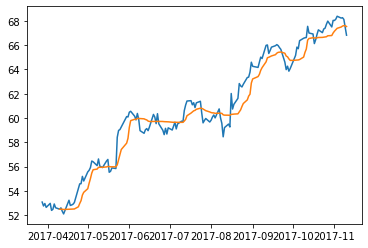

In [62]:
plt.plot(indicator_df['date'],indicator_df['close'])
plt.plot(indicator_df['date'],indicator_df['ki'])

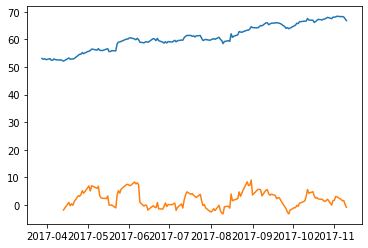

In [67]:
plt.plot(indicator_df['date'],indicator_df['close'])
plt.plot(indicator_df['date'],indicator_df['roc'])